In [9]:
#!pip install perfplot
import numpy as np
import pandas as pd
import perfplot
np.random.seed(120)

def np_add(x):
    np_array = x['np']
    return np_array + 10

def py_add(x):
    py_list = x['py']
    return [i+10 for i in py_list]

def setup(n):
    np_array = np.array(range(n))
    py_list = list(range(n))
    return {'np': np_array, 'py': py_list}

out = perfplot.bench(
    setup=setup,
    kernels=[np_add, py_add],
    n_range=[i for i in range(100,10000101, 1000000)],
    logx=False,
    logy=False,
    equality_check=False,
    xlabel='Num of Elements in List/Array',
    title='Numpy Array vs Python List')



100%|██████████| 11/11 [00:29<00:00,  3.73s/it]A


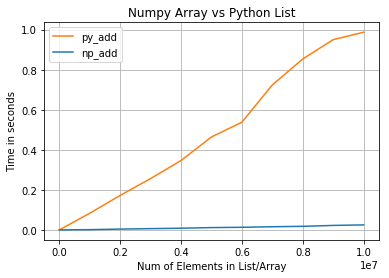

In [10]:
out.show()
out.save('np_array_vs_py_list.png')